# 🚘 💵 HW4 Lab: Used cars and linear regression

<img src="https://github.com/joshuagrossman/mse125-labs-public/blob/main/hw4/img/cars.jpeg?raw=1" alt= “cars” width="500" />

## ✅ Setup and data import
In this lab, we'll explore correlation, simple regression, multiple regression, and confidence intervals with used car data from [Edmunds.com](https://edmunds.com). Our goal will be to predict the price of used cars using the features of each car.

In [ ]:
# Load in additional functions
library(tidyverse)
library(lubridate)

# Use three digits past the decimal point
# Don't use scientific notation
options(digits = 3, scipen=999)

# Format plots with a white background and dark features.
theme_set(theme_bw())

# Increase the default text size of plots.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
theme_update(text = element_text(size = 20))

# Increase the default plot width and height.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
options(repr.plot.width=12, repr.plot.height=8)

cars = read_tsv("https://jdgrossman.com/assets/used-cars.tsv")

# peek at 10 random rows
sample_n(cars, 10)

## 🚀 Exercise 1

Create a new dataset called `accords`. The dataset should only include rows corresponding to used Honda Accords.

Using the `accords` data and the `lm` function, fit the following linear regression model:

$$ y_{\text{price,}i} = \beta_0 + \beta_1 x_{\text{mileage},i} + \epsilon_i, $$

where $\epsilon_i \sim N(0, \sigma^2)$.

Print your regression output with the `summary` function. Using your output, identify and interpret the following quantities in no more than one sentence each:

- $\hat{\beta}_0$
- $\hat{\beta}_1$
- $\text{se}({\hat{\beta}_0})$,
- $\text{se}({\hat{\beta}_1})$,
- $\hat{\sigma}$
- $\text{R}^2$

Note: You should not report more precision than is necessary. For example, if your model returns a coefficient of 1.123456, it's sufficient (and desirable) to report 1.1 or 1.12 as the coefficient.

In [ ]:
accords = cars |>
  filter(make == "Honda", model == "Accord")

model_accords = lm(price ~ mileage, data = accords)

summary(model_accords)


---

The value of $\hat{\beta}_0$ with units: 20675.67

Interpretation:

---

The value of $\hat{\beta}_1$ with units: -0.0878

Interpretation:

---

The value of $\text{se}({\hat{\beta}_0})$ with units: 399.4744

Interpretation:

---

The value of $\text{se}({\hat{\beta}_1})$ with units: 0.0047

Interpretation:

---

The value of $\hat{\sigma}$ with units: 2420

Interpretation:

---

The value of $\text{R}^2$ with units: 0.744

Interpretation:

---

## 🚀 Exercise 2

Using the `predict` function and the model from the previous exercise, predict the average price of a used Honda Accord with an odometer reading of 50,000 miles. Provide a normally-approximated confidence interval for this mean.

In [10]:
# Create a new data frame for prediction
new_data_50k = data.frame(mileage = 50000)

# Get predictions and confidence intervals
predictions_50k = predict(model_accords, newdata = new_data_50k, interval = "confidence")

# Extract predicted mean and confidence interval
predicted_mean = predictions_50k[1, "fit"]
lower_bound = predictions_50k[1, "lwr"]
upper_bound = predictions_50k[1, "upr"]

# Print the results, formatted to two decimal places
cat(sprintf("Predicted average price for 50,000 miles: $%.2f\n", predicted_mean))
cat(sprintf("95%% Confidence Interval for the mean price: [$%.2f, $%.2f]\n", lower_bound, upper_bound))

Predicted average price for 50,000 miles: $16285.20
95% Confidence Interval for the mean price: [$15809.15, $16761.24]


## 🚀 Exercise 3

Repeat Exercise 2 for a used Honda Accord with an odometer reading of 300,000 miles.

Using this result, can you identify a critical issue with your regression model? Answer in one or two sentences.

In [11]:
# Create a new data frame for prediction with 300,000 miles
new_data_300k = data.frame(mileage = 300000)

# Get predictions and confidence intervals
predictions_300k = predict(model_accords, newdata = new_data_300k, interval = "confidence")

# Extract predicted mean and confidence interval
predicted_mean_300k = predictions_300k[1, "fit"]
lower_bound_300k = predictions_300k[1, "lwr"]
upper_bound_300k = predictions_300k[1, "upr"]

# Print the results, formatted to two decimal places
cat(sprintf("Predicted average price for 300,000 miles: $%.2f\n", predicted_mean_300k))
cat(sprintf("95%% Confidence Interval for the mean price: [$%.2f, $%.2f]\n", lower_bound_300k, upper_bound_300k))

Predicted average price for 300,000 miles: $-5667.20
95% Confidence Interval for the mean price: [$-7842.02, $-3492.38]


---

#Write your answer to Exercise 3 here.

The problem is that the model predicts a negative price for a car with a lot of miles. Cars can't be worth less than zero dollars, which shows our simple linear model doesn't work well for cars with very high mileage.

---

## 🚀 Exercise 4

Graphically present your regression model from Exercise 1. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Note that this can be achieved in R using
`geom_smooth` function from `ggplot2`.

- Make sure to adjust the limits of your plot so you can see the issue you identified in the previous problem.

- Format your plot nicely!

`geom_smooth()` using formula = 'y ~ x'


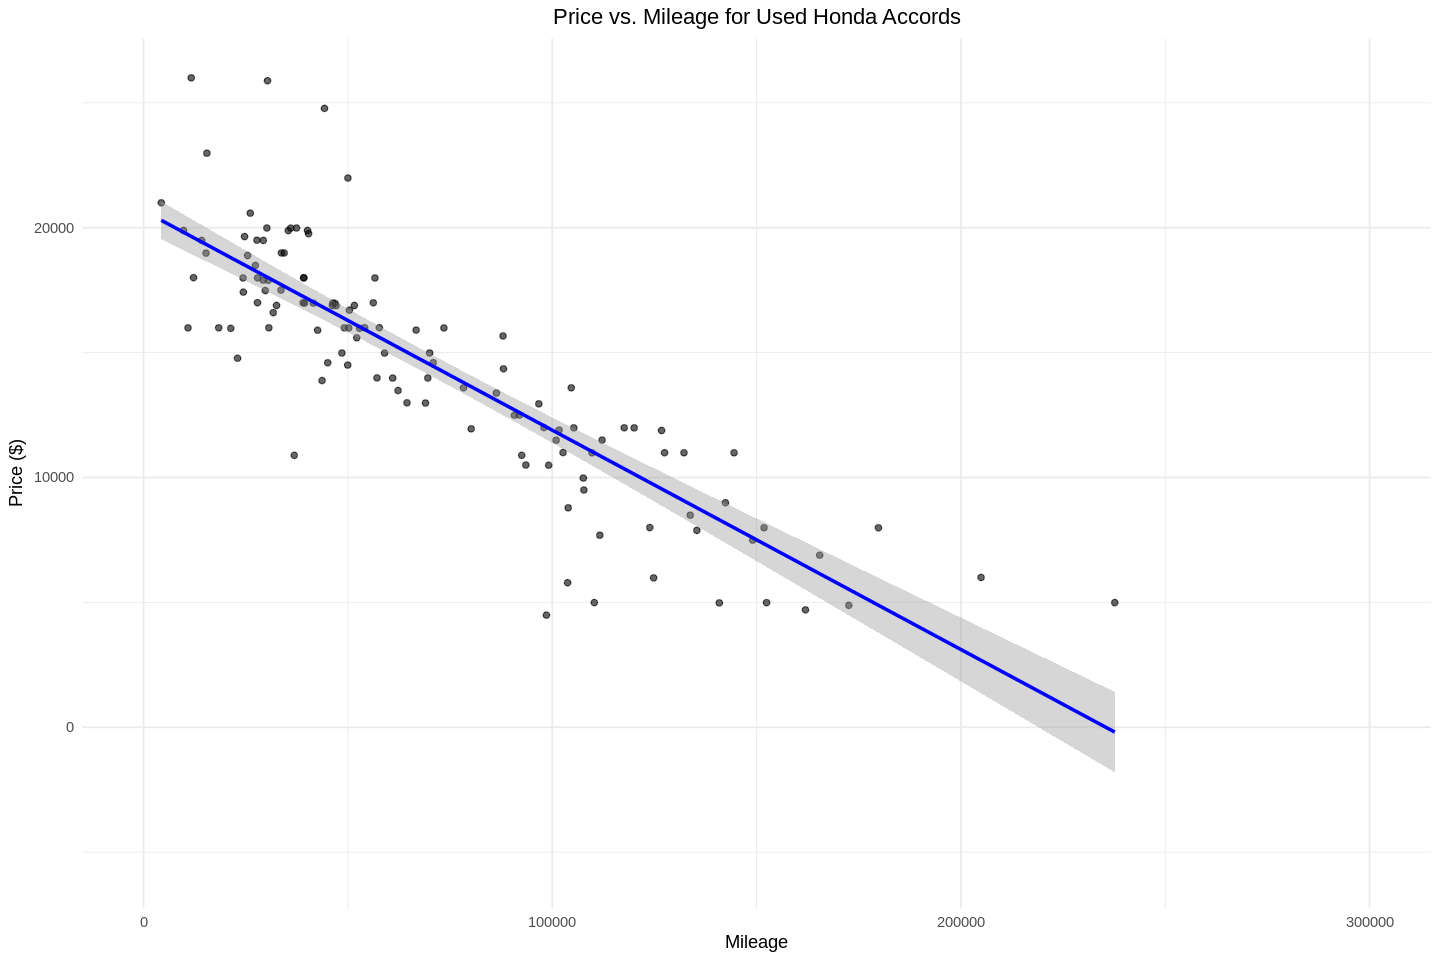

In [12]:

library(ggplot2)

ggplot(accords, aes(x = mileage, y = price)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(title = "Price vs. Mileage for Used Honda Accords",
       x = "Mileage",
       y = "Price ($)") +
  ylim(min(0, predict(model_accords, newdata = data.frame(mileage = 300000))), max(accords$price)) +
  xlim(0, max(300000, accords$mileage)) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

## 🚀 Exercise 5

Address the issue illustrated in Exercises 3 and 4 by refitting your model with a log-transformed outcome.

Use your new model to predict the price (in dollars) of a Honda Accord with a mileage of 50,000 and a mileage of 300,000. **Print the new predicted prices.**

In [13]:

# Refit the model with log-transformed price as the outcome
model_accords_log = lm(log(price) ~ mileage, data = accords)

# Predict for 50,000 miles
new_data_50k = data.frame(mileage = 50000)
predictions_50k_log = predict(model_accords_log, newdata = new_data_50k, interval = "prediction")
predicted_price_50k = exp(predictions_50k_log[1, "fit"])

# Predict for 300,000 miles
new_data_300k = data.frame(mileage = 300000)
predictions_300k_log = predict(model_accords_log, newdata = new_data_300k, interval = "prediction")
predicted_price_300k = exp(predictions_300k_log[1, "fit"])

cat(sprintf("New predicted price for 50,000 miles: $%.2f\n", predicted_price_50k))
cat(sprintf("New predicted price for 300,000 miles: $%.2f\n", predicted_price_300k))

New predicted price for 50,000 miles: $15745.93
New predicted price for 300,000 miles: $2498.62


## 🚀 Exercise 6

Graphically present your regression model from Exercise 5. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Make sure to adjust the limits of your plot so you can see that the issue you identified earlier is now fixed.

- Format your plot nicely!

- Note that the new model can be plotted in R using the `geom_smooth` function with the following arguments:

`geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')))`

> Note: `geom_smooth(method='lm', formula=log(y)~x)` will also plot the correct model (with much prettier and clearer syntax!). However, it puts the model on a logarithmic y-scale instead of a standard numeric scale.
>
> Alternatively, you could use `geom_line()` with a dataset consisting of many possible mileage values (e.g., 0 through 350,000) along with the corresponding predictions  from your new model.

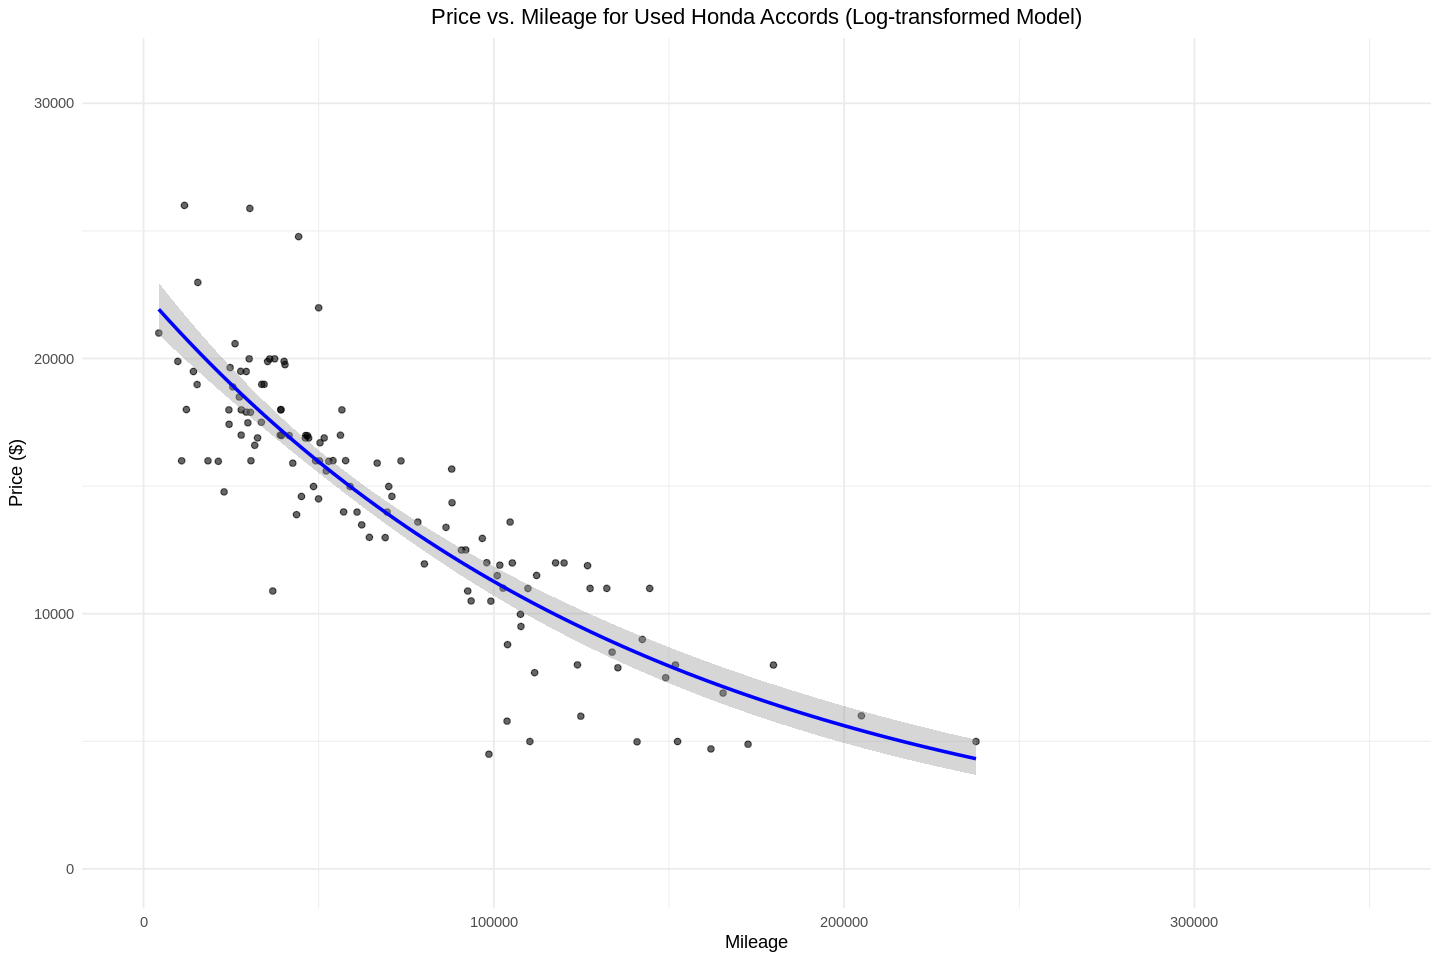

In [14]:

library(ggplot2)

# Create the scatter plot with the log-transformed regression line and confidence bands
ggplot(accords, aes(x = mileage, y = price)) +
  geom_point(alpha = 0.6) + # Scatter plot of the data points
  # Use glm with log link for the regression line on the original scale
  geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')), se = TRUE, color = "blue") +
  labs(title = "Price vs. Mileage for Used Honda Accords (Log-transformed Model)",
       x = "Mileage",
       y = "Price ($)") +
  # Adjust limits to clearly show positive predictions and the range of interest
  ylim(0, max(accords$price, na.rm = TRUE) + 5000) + # Ensure y-axis starts at 0 and goes slightly above max price
  xlim(0, 350000) + # Extend x-axis beyond 300,000 miles
  theme_minimal() + # Nicer theme
  theme(plot.title = element_text(hjust = 0.5)) # Center the title

## 🚀 Exercise 7

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [15]:
# Get model summary
model_summary_log = summary(model_accords_log)

# Extract coefficients
coefs = coef(model_accords_log)
beta0_hat = coefs['(Intercept)']
beta1_hat = coefs['mileage']

# Calculate exp(beta0_hat)
exp_beta0_hat = exp(beta0_hat)

# Calculate exp(beta1_hat)
exp_beta1_hat = exp(beta1_hat)

# Calculate exp(beta1_hat * 10000) for interpretation
exp_beta1_10k_miles = exp(beta1_hat * 10000)

# Extract R-squared
r_squared_log = model_summary_log$r.squared

cat(sprintf("The value of exp(beta_0): %.2f\n", exp_beta0_hat))
cat(sprintf("The value of exp(beta_1): %.6f\n", exp_beta1_hat))
cat(sprintf("The value of R^2: %.3f\n", r_squared_log))

cat("\n--- Interpretation ---\n")
cat(sprintf("\nexp(beta_0) = $%.2f: This is the predicted price of a Honda Accord with 0 miles (a brand new car) in dollars.\n", exp_beta0_hat))
cat(sprintf("\nexp(beta_1) = %.6f: For every additional mile, the price is expected to change by a factor of this value. An increase of 10,000 miles is associated with a multiplicative change in price of %.2f (or a (%.2f-1)*100 = %.2f%% decrease in price). \n", exp_beta1_hat, exp_beta1_10k_miles, exp_beta1_10k_miles, (exp_beta1_10k_miles - 1) * 100))
cat(sprintf("\nR^2 = %.3f: Approximately %.1f%% of the variability in the log of the price of Honda Accords can be explained by mileage.\n", r_squared_log, r_squared_log * 100))

The value of exp(beta_0): 22754.22
The value of exp(beta_1): 0.999993
The value of R^2: 0.748

--- Interpretation ---

exp(beta_0) = $22754.22: This is the predicted price of a Honda Accord with 0 miles (a brand new car) in dollars.

exp(beta_1) = 0.999993: For every additional mile, the price is expected to change by a factor of this value. An increase of 10,000 miles is associated with a multiplicative change in price of 0.93 (or a (0.93-1)*100 = -7.10% decrease in price). 

R^2 = 0.748: Approximately 74.8% of the variability in the log of the price of Honda Accords can be explained by mileage.



---

The value of $\exp(\hat{\beta}_0)$ with units: 22754.22

Interpretation:

---

The value of $\exp(\hat{\beta}_1)$ with units: 0.999

Interpretation:

---

The value of $\text{R}^2$ with units: 0.748

Interpretation:

---

## 🚀 Exercise 8

Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

In [17]:
model_accords_log_year = lm(log(price) ~ mileage + year, data = accords)

summary_model_accords_log_year = summary(model_accords_log_year)
print(summary_model_accords_log_year)

r_squared_log = summary(model_accords_log)$r.squared
r_squared_log_year = summary_model_accords_log_year$r.squared



Call:
lm(formula = log(price) ~ mileage + year, data = accords)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4336 -0.0900 -0.0130  0.0957  0.3064 

Coefficients:
                  Estimate     Std. Error t value             Pr(>|t|)    
(Intercept) -122.979520950   13.342161366   -9.22   0.0000000000000013 ***
mileage       -0.000002927    0.000000531   -5.51   0.0000002063084603 ***
year           0.066055766    0.006625906    9.97 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.149 on 119 degrees of freedom
Multiple R-squared:  0.863,	Adjusted R-squared:  0.86 
F-statistic:  374 on 2 and 119 DF,  p-value: <0.0000000000000002



---

#Write your answer to Exercise 8 here.

The R^2 of the revised model (0.863) is higher than the R^2 of the previous model (0.748), indicating a slightly better fit.

---

## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [18]:
model_cars_log_year = lm(log(price) ~ mileage + year, data = cars)

summary_model_cars_log_year = summary(model_cars_log_year)
print(summary_model_cars_log_year)

r_squared_accords = summary(model_accords_log_year)$r.squared
r_squared_cars = summary_model_cars_log_year$r.squared

cat(sprintf("\nR^2 for Accords model: %.3f\n", r_squared_accords))
cat(sprintf("R^2 for entire dataset model: %.3f\n", r_squared_cars))


Call:
lm(formula = log(price) ~ mileage + year, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6781 -0.1846  0.0327  0.2003  0.5477 

Coefficients:
                  Estimate     Std. Error t value            Pr(>|t|)    
(Intercept) -147.390831781    9.007586848   -16.4 <0.0000000000000002 ***
mileage       -0.000004102    0.000000353   -11.6 <0.0000000000000002 ***
year           0.078344037    0.004473232    17.5 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.285 on 1283 degrees of freedom
Multiple R-squared:  0.653,	Adjusted R-squared:  0.653 
F-statistic: 1.21e+03 on 2 and 1283 DF,  p-value: <0.0000000000000002


R^2 for Accords model: 0.863
R^2 for entire dataset model: 0.653


---

Write your answer to Exercise 9 here.

This is likely because the full dataset contains a much wider variety of car makes and models, more variability in prices that this simplified model cannot account for, thus reducing its explanatory power.

---

## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [19]:
model_cars_log_year_make_model = lm(log(price) ~ mileage + year + make + model, data = cars)

summary_model_cars_log_year_make_model = summary(model_cars_log_year_make_model)
print(summary_model_cars_log_year_make_model)

r_squared_cars_full = summary_model_cars_log_year_make_model$r.squared
cat(sprintf("\nR^2 for full model with make and model: %.3f\n", r_squared_cars_full))

coefs_full = coef(model_cars_log_year_make_model)
exp_beta0_hat_full = exp(coefs_full['(Intercept)'])

cat(sprintf("\nExponentiated intercept (exp(beta_0)) for the new model: $%.2f\n", exp_beta0_hat_full))



Call:
lm(formula = log(price) ~ mileage + year + make + model, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6320 -0.0910 -0.0045  0.0853  0.7483 

Coefficients: (7 not defined because of singularities)
                     Estimate     Std. Error t value             Pr(>|t|)    
(Intercept)    -164.064825669    4.591381014  -35.73 < 0.0000000000000002 ***
mileage          -0.000003334    0.000000181  -18.45 < 0.0000000000000002 ***
year              0.086652565    0.002280537   38.00 < 0.0000000000000002 ***
makeAudi         -0.050738557    0.018743892   -2.71               0.0069 ** 
makeBMW           0.095719099    0.016738693    5.72          0.000000013 ***
makeCadillac     -0.052775232    0.019378585   -2.72               0.0066 ** 
makeHonda        -0.437729351    0.019125695  -22.89 < 0.0000000000000002 ***
makeInfiniti     -0.055480601    0.018693236   -2.97               0.0031 ** 
makeLexus         0.291852385    0.019663294   14.84 < 0.00000000000000

---

Write your answer to Exercise 10 here.

exp(β̂0) represents the predicted price of a car when mileage = 0, year = 0, and for the reference levels of make and model (usually the first alphabetically), which is not realistic.

Center or rescale predictors (e.g., mileage relative to 0 and year relative to a meaningful reference year), so the intercept corresponds to a realistic car (e.g., a car with 0 miles in the year 2020).

---

# 🚀 Exercise 11

Implement your suggested change from Exercise 10, and print the resulting model output.

What's the interpretation of the exponentiated intercept term? Answer in one sentence.

What's the interpretation of the term for the model year? Answer in one sentence.

In [ ]:
# Your code here!



---

Write your answer to Exercise 11 here.


---